<a href="https://colab.research.google.com/github/MirandaCR/TEC/blob/main/Avance_5_Equipo20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




<div align="left">
  <img src="https://brandemia.org/sites/default/files/sites/default/files/tec_monterrey_nuevo_logo.png" width="500" height="300">
</div>

# **Proyecto Integrador**


## Integrantes:
 <ul>
      <li>Alfonso Garibay</li>
      <li>Cristian Miranda</li>
       <li>Jaik Yocks</li>
 </ul>


In [41]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_recall_curve
from imblearn.over_sampling import SMOTE, RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Cargar los datos
file_path = '/content/Dataset.xlsx'
df = pd.read_excel(file_path)

In [3]:
# Codificar la variable objetivo 'SELECCIONADO'
label_encoder = LabelEncoder()
df['SELECCIONADO'] = label_encoder.fit_transform(df['SELECCIONADO'])

# Preparar el conjunto de características y la variable objetivo
X = df.drop(columns=['SELECCIONADO'])
y = df['SELECCIONADO']

# Convertir las columnas categóricas a variables numéricas mediante One-Hot Encoding
X = pd.get_dummies(X)

In [4]:
# Verificar el balance de clases
print(y.value_counts())

SELECCIONADO
1    68
0    28
2     1
Name: count, dtype: int64


In [5]:
# Balancear las clases usando RandomOverSampler y luego SMOTE
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_over, y_over = oversample.fit_resample(X, y)
smote = SMOTE(random_state=42, k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X_over, y_over)

In [6]:
# Verificar nuevamente el balance de clases
print(y_resampled.value_counts())

SELECCIONADO
1    68
0    68
2    68
Name: count, dtype: int64


In [7]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Escalar las características numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Inicializar los modelos con hiperparámetros definidos manualmente
models = {
    'Logistic Regression': LogisticRegression(C=1.0, solver='liblinear', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(criterion='gini', max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'Support Vector Machine': SVC(C=1.0, kernel='rbf', probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

In [12]:
# Entrenar y evaluar los modelos con validación cruzada estratificada
model_results = {}
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for model_name, model in models.items():
    start_time = time.time()
    cv_scores = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    end_time = time.time()

    model_results[model_name] = {
        'Cross-Validated Accuracy': np.mean(cv_scores),
        'Test Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob),
        'Training Time': end_time - start_time
    }

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

In [13]:
# Convertir los resultados a un DataFrame para mejor visualización
model_results_df = pd.DataFrame(model_results).T
print(model_results_df)

                        Cross-Validated Accuracy  Test Accuracy  Precision  \
Logistic Regression                     0.660000           0.75   0.875000   
Decision Tree                           0.730000           0.90   1.000000   
Random Forest                           0.832500           0.80   0.882353   
Gradient Boosting                       0.780000           0.85   1.000000   
Support Vector Machine                  0.754167           0.80   0.882353   
K-Nearest Neighbors                     0.728333           0.70   0.823529   

                          Recall  F1 Score   ROC AUC  Training Time  
Logistic Regression     0.823529  0.848485  0.784314       0.025735  
Decision Tree           0.882353  0.937500  0.941176       0.012006  
Random Forest           0.882353  0.882353  0.901961       0.878919  
Gradient Boosting       0.823529  0.903226  0.882353       1.360428  
Support Vector Machine  0.882353  0.882353  0.666667       0.033953  
K-Nearest Neighbors     0.823529 

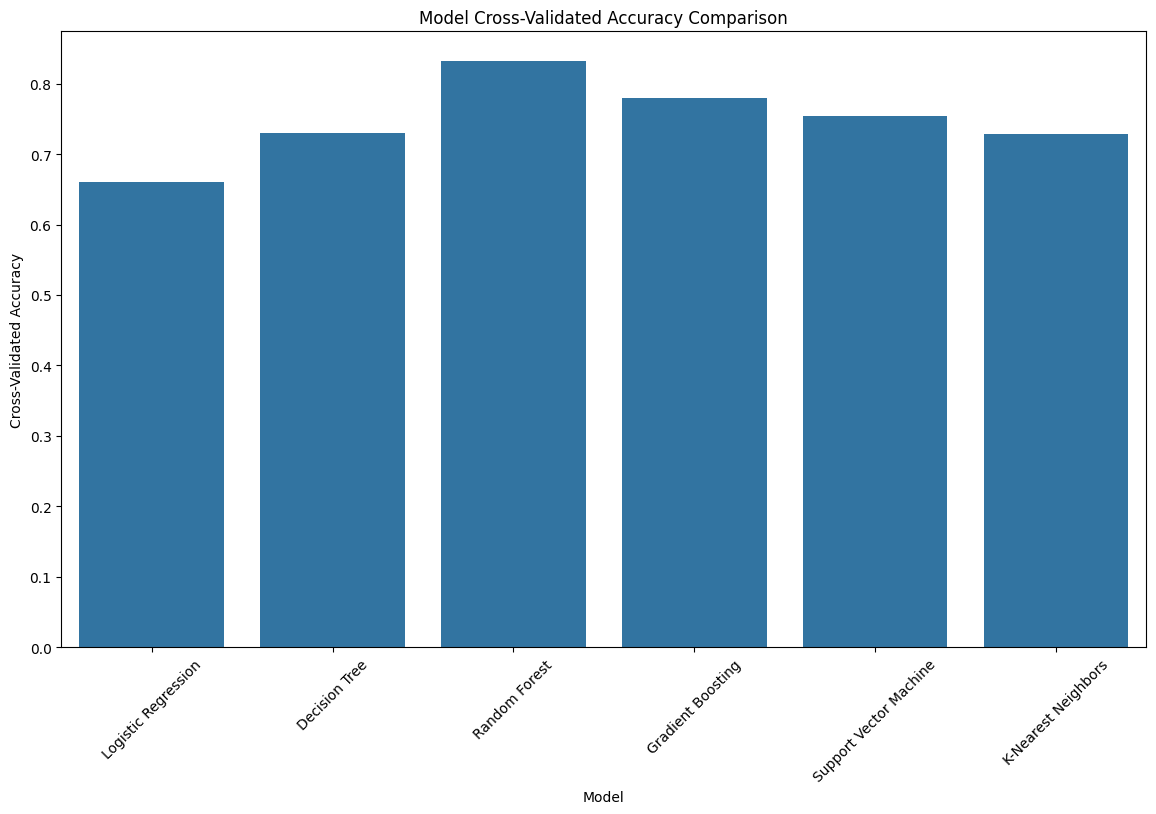

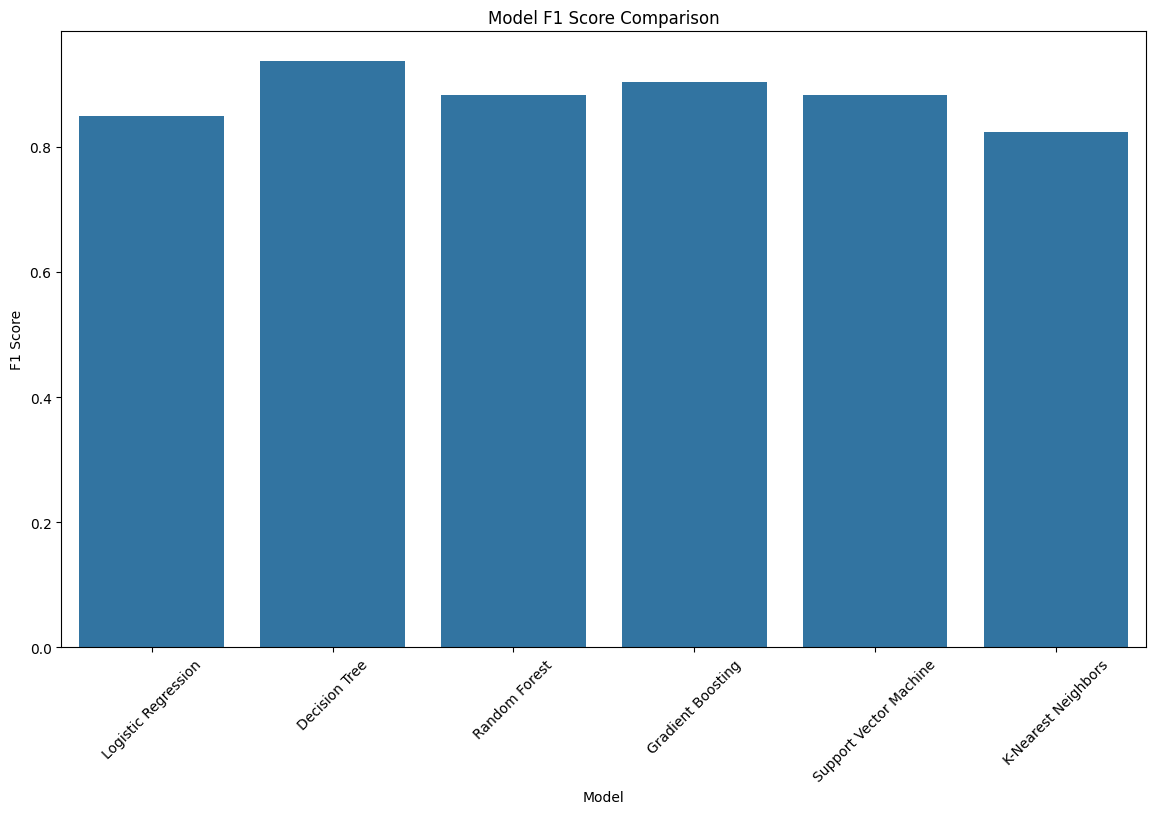

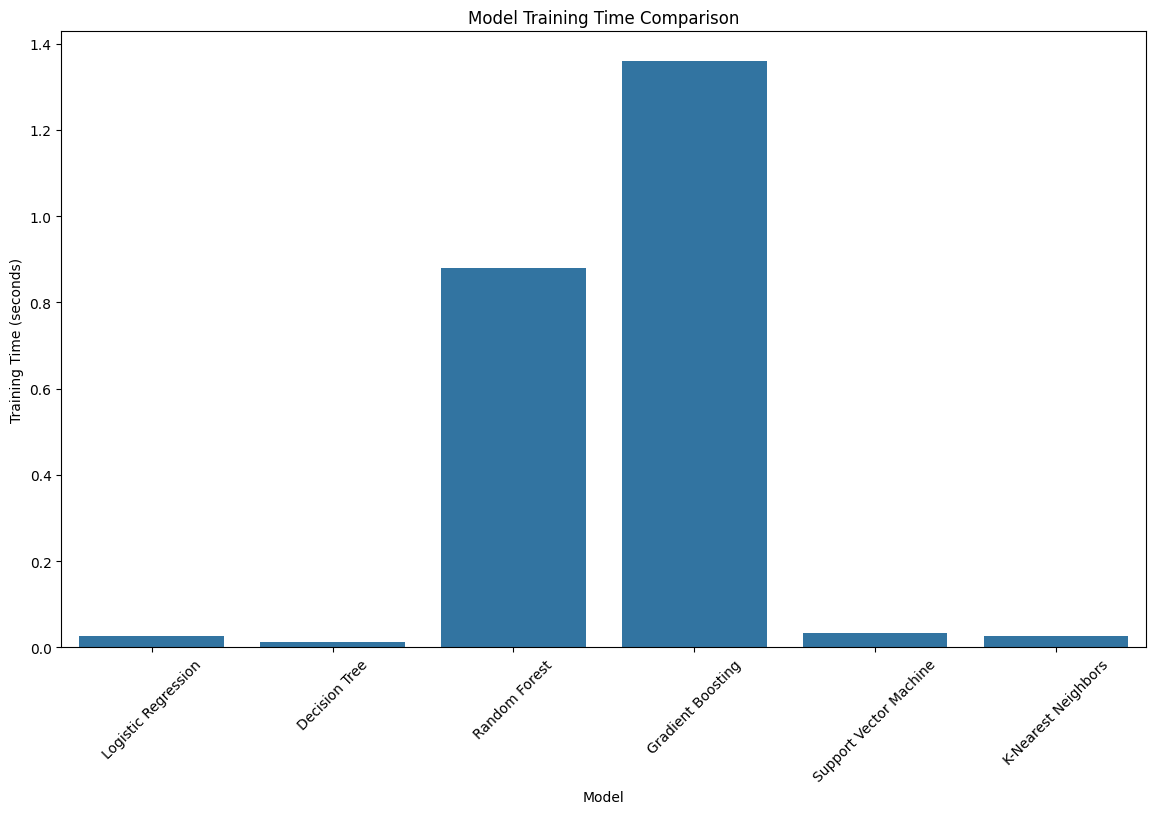

In [14]:
# Visualizar los resultados
plt.figure(figsize=(14, 8))
sns.barplot(x=model_results_df.index, y='Cross-Validated Accuracy', data=model_results_df)
plt.title('Model Cross-Validated Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x=model_results_df.index, y='F1 Score', data=model_results_df)
plt.title('Model F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x=model_results_df.index, y='Training Time', data=model_results_df)
plt.title('Model Training Time Comparison')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45)
plt.show()


In [15]:
# Seleccionar los dos mejores modelos basados en Cross-Validated Accuracy
top_models = model_results_df.nlargest(2, 'Cross-Validated Accuracy')
print(f"Top models:\n{top_models}")


Top models:
                   Cross-Validated Accuracy  Test Accuracy  Precision  \
Random Forest                        0.8325           0.80   0.882353   
Gradient Boosting                    0.7800           0.85   1.000000   

                     Recall  F1 Score   ROC AUC  Training Time  
Random Forest      0.882353  0.882353  0.901961       0.878919  
Gradient Boosting  0.823529  0.903226  0.882353       1.360428  


In [16]:
# Definir los hiperparámetros para la búsqueda más exhaustiva utilizando RandomizedSearchCV
param_grid = {
    'Random Forest': {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [5, 10, 15, 20, 25, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 4, 5, 6],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5]
    }
}

In [17]:
# Ajuste de hiperparámetros para los dos mejores modelos
best_models = {}
for model_name in top_models.index:
    randomized_search = RandomizedSearchCV(models[model_name], param_grid[model_name], scoring='accuracy', cv=5, n_iter=100, n_jobs=-1, random_state=42)
    randomized_search.fit(X_train, y_train)
    best_models[model_name] = randomized_search.best_estimator_
    print(f"Best parameters for {model_name}: {randomized_search.best_params_}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for Gradient Boosting: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 6, 'learning_rate': 0.2}


In [21]:
# Crear modelos de ensamblaje
# Voting Classifier (ensamble homogéneo)
voting_clf = VotingClassifier(estimators=[
    ('rf', best_models['Random Forest']),
    ('gb', best_models['Gradient Boosting'])
], voting='soft')

# Stacking Classifier (ensamble heterogéneo)
stacking_clf = StackingClassifier(estimators=[
    ('rf', best_models['Random Forest']),
    ('gb', best_models['Gradient Boosting']),
    ('svc', models['Support Vector Machine'])  # Agregar SVM para heterogeneidad
], final_estimator=LogisticRegression(), cv=5)

# AdaBoost Classifier (ensamble homogéneo)
adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)

# Bagging Classifier (ensamble homogéneo)
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), n_estimators=100, random_state=42)


In [45]:
# Evaluar los modelos de ensamblaje
ensemble_models = {
    'Voting Classifier': voting_clf,
    'Stacking Classifier': stacking_clf,
    'AdaBoost Classifier': adaboost_clf,
    'Bagging Classifier': bagging_clf
}

In [46]:
# Solo evaluamos los modelos de ensamblaje
ensemble_results = {}
for model_name, model in ensemble_models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    end_time = time.time()

    ensemble_results[model_name] = {
        'Test Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob),
        'Training Time': end_time - start_time,
        'Combined Metric': (accuracy_score(y_test, y_pred) + roc_auc_score(y_test, y_prob)) / 2
    }

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1116: RuntimeWarning: Number of classes in training fold (2) does not match total number of classes (3). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1116: RuntimeWarning: Number of classes in training fold (2) does not match total number of classes (3). Results may not be appropriate for your use case. To fix this, use a cross-validation technique re

In [47]:
# Actualizar el DataFrame de resultados con los modelos de ensamblaje
ensemble_results_df = pd.DataFrame(ensemble_results).T
print(ensemble_results_df)

                     Test Accuracy  Precision    Recall  F1 Score   ROC AUC  \
Voting Classifier             0.90       1.00  0.882353  0.937500  0.901961   
Stacking Classifier           0.90       1.00  0.882353  0.937500  0.901961   
AdaBoost Classifier           0.85       0.85  1.000000  0.918919  0.676471   
Bagging Classifier            0.85       1.00  0.823529  0.903226  0.911765   

                     Training Time  Combined Metric  
Voting Classifier         1.574909         0.900980  
Stacking Classifier      11.602452         0.900980  
AdaBoost Classifier       0.184886         0.763235  
Bagging Classifier        0.197188         0.880882  


In [48]:
# Seleccionar el mejor modelo basado en la métrica combinada de Test Accuracy y ROC AUC
final_model_name = ensemble_results_df.nlargest(1, 'Combined Metric').index[0]
final_model = ensemble_models[final_model_name]
y_pred_final = final_model.predict(X_test)
y_prob_final = final_model.predict_proba(X_test)[:, 1] if hasattr(final_model, "predict_proba") else final_model.decision_function(X_test)
final_performance = {
    'Accuracy': accuracy_score(y_test, y_pred_final),
    'Precision': precision_score(y_test, y_pred_final),
    'Recall': recall_score(y_test, y_pred_final),
    'F1 Score': f1_score(y_test, y_pred_final),
    'ROC AUC': roc_auc_score(y_test, y_prob_final)
}
print(f"Final model: {final_model_name} - Performance: {final_performance}")
print(classification_report(y_test, y_pred_final))

Final model: Voting Classifier - Performance: {'Accuracy': 0.9, 'Precision': 1.0, 'Recall': 0.8823529411764706, 'F1 Score': 0.9375, 'ROC AUC': 0.9019607843137254}
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.88      0.94        17

    accuracy                           0.90        20
   macro avg       0.80      0.94      0.84        20
weighted avg       0.94      0.90      0.91        20



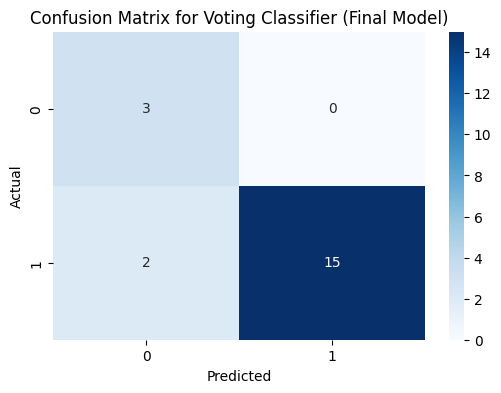

In [34]:
# Matriz de Confusión del mejor modelo
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6,4))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {final_model_name} (Final Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

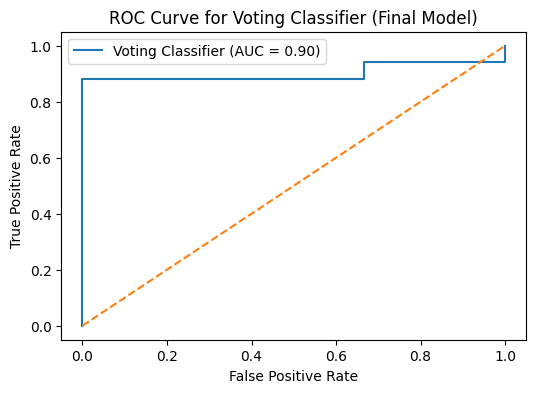

In [35]:
# Curva ROC del mejor modelo
fpr_final, tpr_final, _final = roc_curve(y_test, y_prob_final)
plt.figure(figsize=(6,4))
plt.plot(fpr_final, tpr_final, label=f'{final_model_name} (AUC = {final_performance["ROC AUC"]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {final_model_name} (Final Model)')
plt.legend()
plt.show()

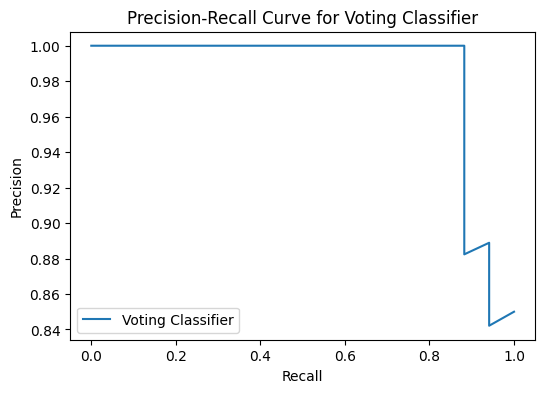

In [36]:
# Curva de Precisión-Recall
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_final)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'{final_model_name}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve for {final_model_name}')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


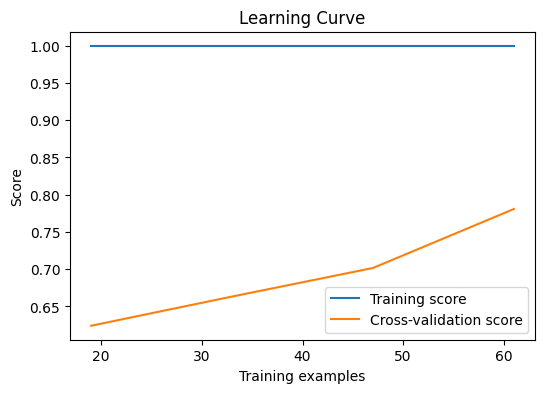

In [42]:
# Curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(final_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


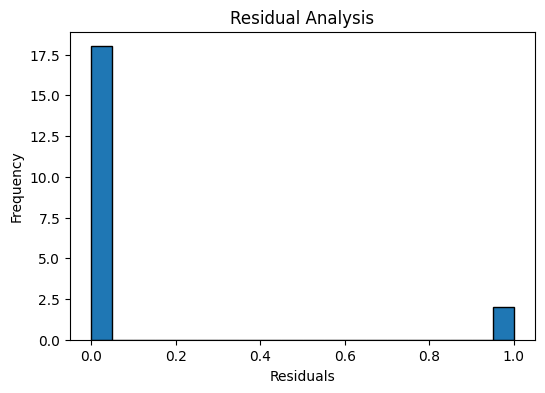

In [43]:
# Gráfico de análisis de residuos
residuals = y_test - y_pred_final
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Analysis')
plt.show()

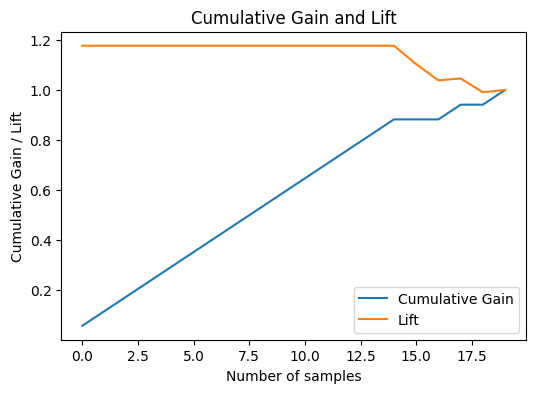

In [44]:
# Curva de ganancias y lift
def plot_cumulative_gain(model, X, y):
    probas = model.predict_proba(X)[:, 1]
    df = pd.DataFrame({'y': y, 'probas': probas})
    df = df.sort_values(by='probas', ascending=False)
    df['cumulative_gain'] = np.cumsum(df['y']) / df['y'].sum()
    df['lift'] = df['cumulative_gain'] / (np.arange(len(df)) + 1) * len(df)

    plt.figure(figsize=(6, 4))
    plt.plot(np.arange(len(df)), df['cumulative_gain'], label='Cumulative Gain')
    plt.plot(np.arange(len(df)), df['lift'], label='Lift')
    plt.xlabel('Number of samples')
    plt.ylabel('Cumulative Gain / Lift')
    plt.title('Cumulative Gain and Lift')
    plt.legend()
    plt.show()

plot_cumulative_gain(final_model, X_test, y_test)

In [51]:
# Comparativa del mejor modelo individual y los cuatro modelos de ensamblaje
best_individual_model_name = 'Random Forest'
comparison_df = pd.concat([model_results_df.loc[[best_individual_model_name]], ensemble_results_df]).sort_values(by='Test Accuracy', ascending=False)

print("Comparativa del mejor modelo individual y los modelos de ensamblaje:")
print(comparison_df[['Test Accuracy', 'Precision', 'Recall', 'Training Time']])

Comparativa del mejor modelo individual y los modelos de ensamblaje:
                     Test Accuracy  Precision    Recall  Training Time
Voting Classifier             0.90   1.000000  0.882353       1.574909
Stacking Classifier           0.90   1.000000  0.882353      11.602452
AdaBoost Classifier           0.85   0.850000  1.000000       0.184886
Bagging Classifier            0.85   1.000000  0.823529       0.197188
Random Forest                 0.80   0.882353  0.882353       0.878919


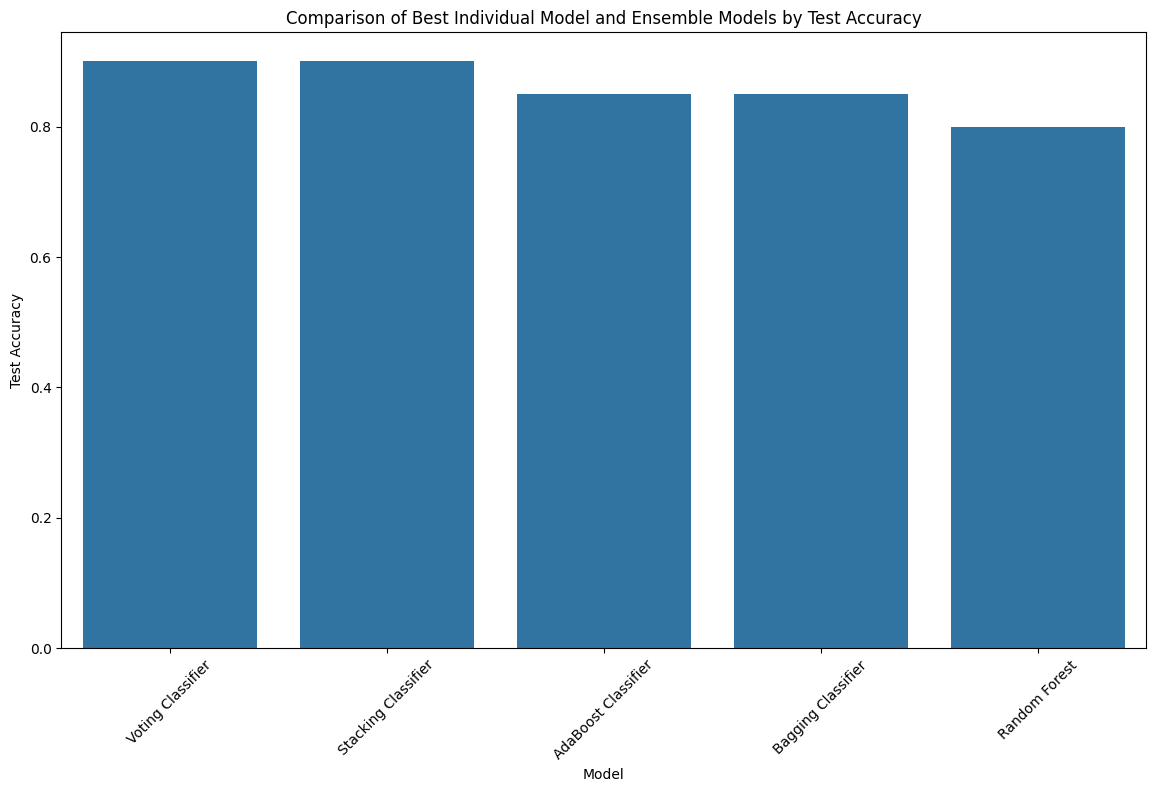

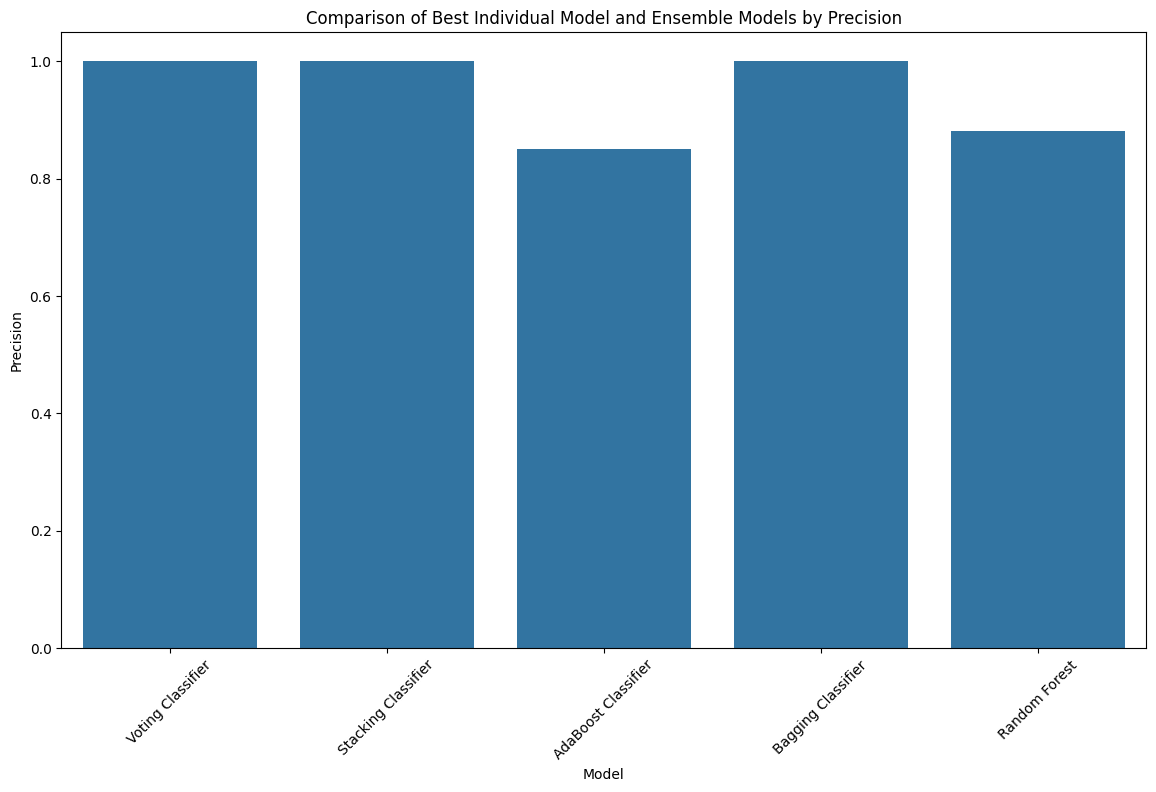

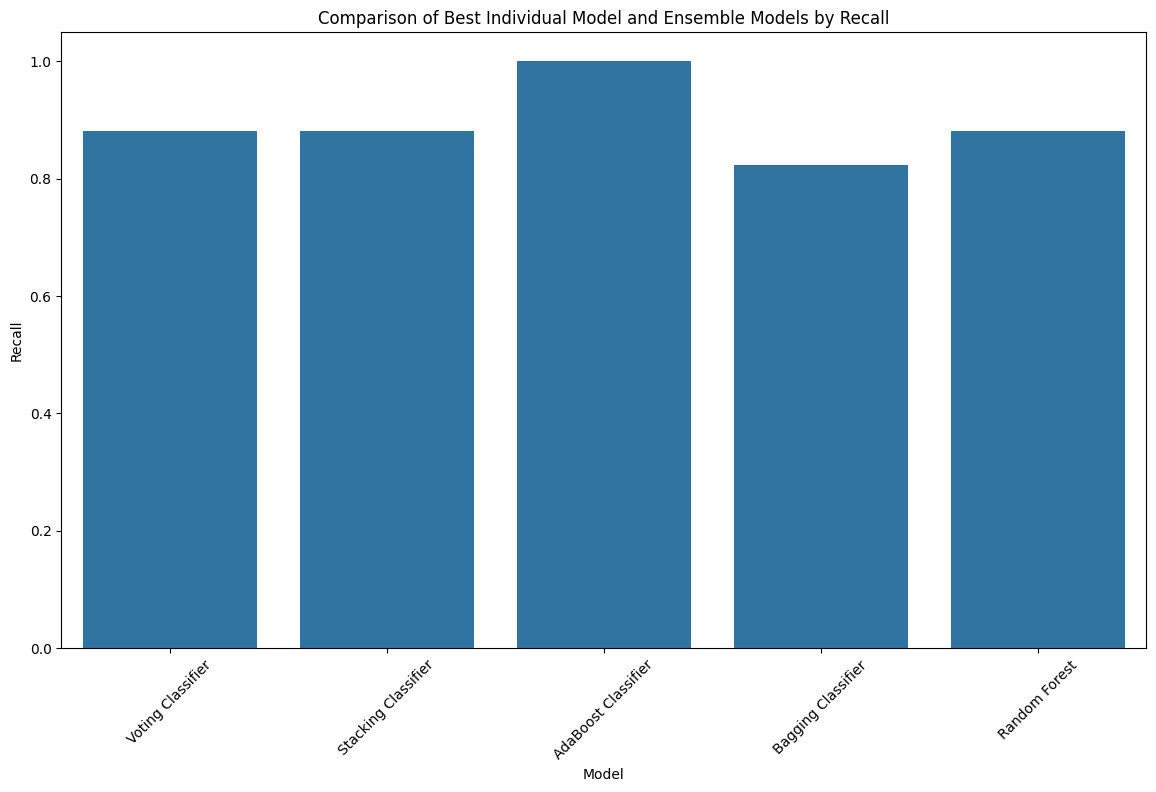

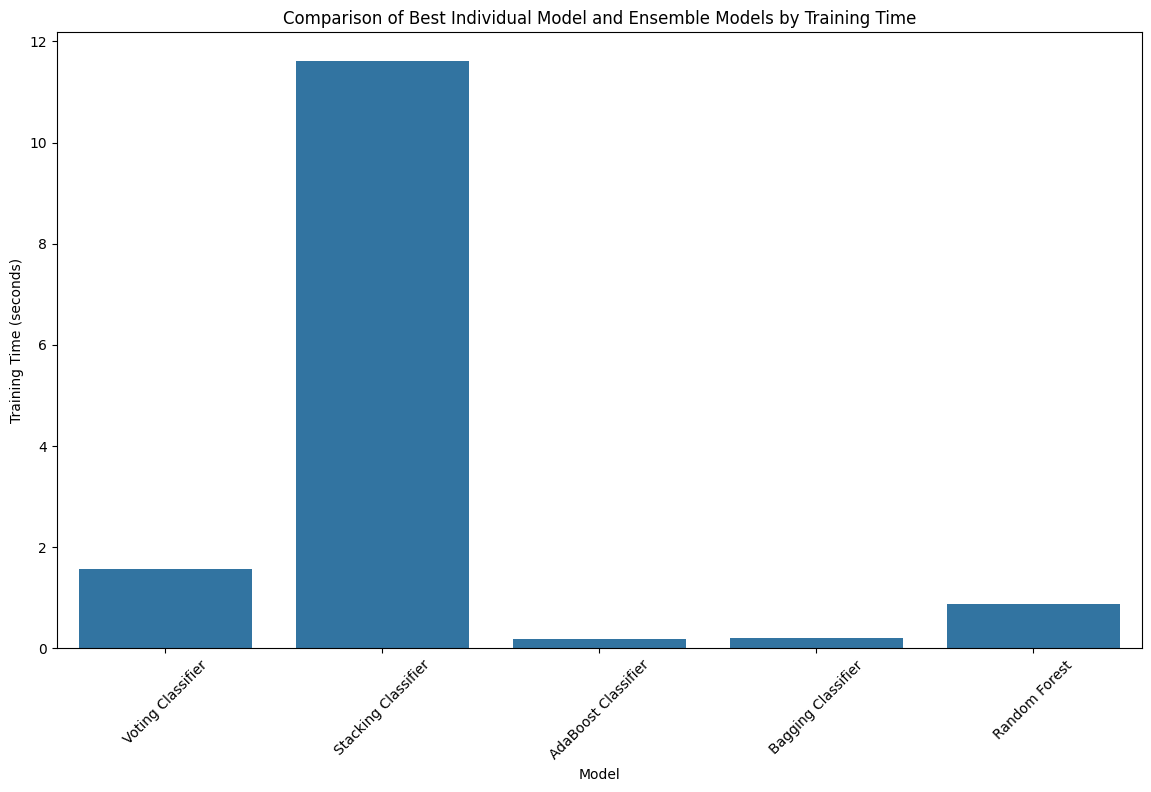

In [52]:
# Visualización de la comparativa
plt.figure(figsize=(14, 8))
sns.barplot(x=comparison_df.index, y='Test Accuracy', data=comparison_df)
plt.title('Comparison of Best Individual Model and Ensemble Models by Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x=comparison_df.index, y='Precision', data=comparison_df)
plt.title('Comparison of Best Individual Model and Ensemble Models by Precision')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x=comparison_df.index, y='Recall', data=comparison_df)
plt.title('Comparison of Best Individual Model and Ensemble Models by Recall')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x=comparison_df.index, y='Training Time', data=comparison_df)
plt.title('Comparison of Best Individual Model and Ensemble Models by Training Time')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45)
plt.show()